In [ ]:
# Cf. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
# Librairie pandas (manipulation de données csv, dataframe, etc.)
import pandas as pd

# Import et lecture du corpus :
corpus = pd.read_csv('corpus_tokmorph.csv')
corpus.head()

,Unnamed: 0,Unnamed: 0.1,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,0,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,1,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,2,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,3,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,4,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"


In [2]:
corpus = corpus.drop('Unnamed: 0', 1)
corpus = corpus.drop('Unnamed: 0.1', 1)
corpus

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
36074,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,to,['to'],['ADP'],"(['ADP'], ['VERB'], ['PRON'])"
36075,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,hide,['hide'],['VERB'],"(['VERB'], ['PRON'], ['NOUN'])"
36076,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,your,['your'],['PRON'],"(['PRON'], ['NOUN'], ['ADV'])"
36077,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,love,['love'],['NOUN'],"(['NOUN'], ['ADV'], ['NaN'])"


In [3]:
corpus

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
36074,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,to,['to'],['ADP'],"(['ADP'], ['VERB'], ['PRON'])"
36075,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,hide,['hide'],['VERB'],"(['VERB'], ['PRON'], ['NOUN'])"
36076,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,your,['your'],['PRON'],"(['PRON'], ['NOUN'], ['ADV'])"
36077,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,love,['love'],['NOUN'],"(['NOUN'], ['ADV'], ['NaN'])"


In [86]:
# Sélection des colonnes pour le count : 

count = corpus[['Song', 'words']]
count

# Cross tab fonction pour compter les valeurs de chaque Songwriter
# on veut que notre index correspondent à notre corpus (LEN, MCC, LMC) et les colonnes à nos mots 
# Cf. https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe/47187144#47187144

count = pd.crosstab(index=count['Song'], columns=count['words'])
count
# Ajout de la colonne Songwriter(s) :

    # Téléchargement du corpus initial pour récupération de la variable Songwriters
    
corpus_clean = pd.read_csv('corpus_nettoye.csv')

    # Reset de l'index pour éviter l'introduction de NaN

corpus_clean.reset_index(drop=False, inplace=True)
count.reset_index(drop=False, inplace=True)

# Concaténation de la colonne Songwriters : 

count = pd.concat([count, corpus_clean['Songwriter(s)']], axis=1)

count = count.set_index(['Songwriter(s)', 'Song'])
count

!  "  '  'Cause  \
Songwriter(s)    Song                                                       
Lennon           "A Day in the Life"                   0  0  0  0       0   
                 "A Hard Day's Night"                  0  1  0  0       0   
McCartney        "Across the Universe"                 0  0  0  0       0   
Lennon-McCartney "All I've Got to Do"                 24  0  0  0       0   
Lennon           "All My Loving"                       0  0  0  0       0   
...                                                   .. .. .. ..     ...   
McCartney        "You Won't See Me"                    0  0  0  0       0   
Lennon-McCartney "You'll Be Mine"                      0  1  0  0       0   
McCartney        "You're Going to Lose That Girl"      0  0  0  0       1   
Lennon           "You've Got to Hide Your Love Away"   0  0  2  0       0   
                 "Your Mother Should Know"             0  0  0  0       0   

                                                      'cause  'd  'll  'm  \
Songwriter(s)    Song                                                       
Lennon           "A Day in the Life"                       0   3    0   0   
                 "A Hard Day's Night"                      2   0    2   4   
McCartney        "Across the Universe"                     0   0    0   0   
Lennon-McCartney "All I've Got to Do"                      0   0    5   0   
Lennon           "All My Loving"                           0   0   15   4   
...                                                      ...  ..  ...  ..   
McCartney        "You Won't See Me"                        0   0    0   0   
Lennon-McCartney "You'll Be Mine"                          0   0    9   0   
McCartney        "You're Going to Lose That Girl"          0   0    3   0   
Lennon           "You've Got to Hide Your Love Away"       0   0    0   1   
                 "Your Mother Should Know"                 0   0    0   0   

                                                      're  ...  yet  yi  you  \
Songwriter(s)    Song                                      ...                 
Lennon           "A Day in the Life"                    0  ...    0   0    2   
                 "A Hard Day's Night"                   1  ...    0   0   12   
McCartney        "Across the Universe"                  0  ...    0   0    0   
Lennon-McCartney "All I've Got to Do"                   0  ...    0   0   14   
Lennon           "All My Loving"                        0  ...    0   0   10   
...                                                   ...  ...  ...  ..  ...   
McCartney        "You Won't See Me"                     2  ...    0   0   16   
Lennon-McCartney "You'll Be Mine"                       0  ...    0   0    5   
McCartney        "You're Going to Lose That Girl"      16  ...    0   0    9   
Lennon           "You've Got to Hide Your Love Away"    0  ...    0   0    6   
                 "Your Mother Should Know"              0  ...    0   0    0   

                                                      young  younger  your  \
Songwriter(s)    Song                                                        
Lennon           "A Day in the Life"                      0        0     0   
                 "A Hard Day's Night"                     0        0     0   
McCartney        "Across the Universe"                    0        0     0   
Lennon-McCartney "All I've Got to Do"                     0        0     1   
Lennon           "All My Loving"                          0        0     2   
...                                                     ...      ...   ...   
McCartney        "You Won't See Me"                       0        0     2   
Lennon-McCartney "You'll Be Mine"                         0        0     1   
McCartney        "You're Going to Lose That Girl"         0        0     0   
Lennon           "You've Got to Hide Your Love Away"      0        0     4   
                 "Your Mother Should Know"                0        0    11   

In [15]:
#count

In [10]:
# À lancer la première fois pour téléchargement...

# %pip install sklearn-pandas

Here we need to perform a few normalisations, such as z-scores each variable, and operating a vector-length normalisation (to euclidean length 1) for texts (cf. Evert et al., 2017, doi:10.1093/llc/fqx023).

**DÉBUT PARCOURS MODIFIÉ (JBC)**


In [87]:
# Calcul des z-scores :

# Pour chacun des n traits et des x sous-corpus d’auteurs, calculer un Zscore 
# qui décrit l’écart entre la présence de ce trait dans ce sous-corpus et la norme du corpus. 
# Pour ce faire, il faut soustraire la “moyenne de moyennes” du corpus pour le trait de 
# la présence de ce trait observée dans le sous-corpus, puis diviser le résultat par 
# l’écart-type du trait. La figure 7 présente la formule de calcul de la cote Z pour 
# le trait ‘i’, où C(i) représente la fréquence observée, la lettre grecque mu 
# représente la moyenne des moyennes, et la lettre grecque sigma représente l’écart-type.
# Cf. https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

import sklearn.preprocessing as preproc
import sklearn.pipeline

# Fonctions pour garder le format df :

#z-scores
scaler = preproc.StandardScaler().fit(count)
scaled_features = scaler.transform(count)
#vector-length normalisation, aka L2 Norm
transformer = preproc.Normalizer().fit(scaled_features)
scaled_features = transformer.transform(scaled_features)

#mapper = DataFrameMapper([(count.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(count.copy(), 2576) # nb colonnes
scaled_features_count = pd.DataFrame(scaled_features, index=count.index, columns=count.columns)

# fit_transform(X[, y]) ==> Fit to data, then transform it.
# inverse_transform(X[, copy]) ==> Scale back the data to the original representation


In [88]:
scaled_features_count

!  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002059 -0.002498   
                 "A Hard Day's Night"                -0.004375  0.017871   
McCartney        "Across the Universe"               -0.002113 -0.002564   
Lennon-McCartney "All I've Got to Do"                 0.168521 -0.006179   
Lennon           "All My Loving"                     -0.004480 -0.005437   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.003909 -0.004744   
Lennon-McCartney "You'll Be Mine"                    -0.005388  0.022009   
McCartney        "You're Going to Lose That Girl"    -0.005578 -0.006769   
Lennon           "You've Got to Hide Your Love Away" -0.004160 -0.005049   
                 "Your Mother Should Know"           -0.004201 -0.005098   

                                                             "         '  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002502 -0.002349   
                 "A Hard Day's Night"                -0.005317 -0.004992   
McCartney        "Across the Universe"               -0.002568 -0.002411   
Lennon-McCartney "All I've Got to Do"                -0.006188 -0.005809   
Lennon           "All My Loving"                     -0.005444 -0.005112   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.004750 -0.004460   
Lennon-McCartney "You'll Be Mine"                    -0.006548 -0.006148   
McCartney        "You're Going to Lose That Girl"    -0.006779 -0.006364   
Lennon           "You've Got to Hide Your Love Away"  0.022788 -0.004746   
                 "Your Mother Should Know"           -0.005105 -0.004793   

                                                        'Cause    'cause  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002591 -0.002442   
                 "A Hard Day's Night"                -0.005506  0.137730   
McCartney        "Across the Universe"               -0.002659 -0.002506   
Lennon-McCartney "All I've Got to Do"                -0.006408 -0.006040   
Lennon           "All My Loving"                     -0.005639 -0.005315   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.004920 -0.004637   
Lennon-McCartney "You'll Be Mine"                    -0.006781 -0.006392   
McCartney        "You're Going to Lose That Girl"     0.045339 -0.006617   
Lennon           "You've Got to Hide Your Love Away" -0.005236 -0.004935   
                 "Your Mother Should Know"           -0.005287 -0.004984   

                                                            'd       'll  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                  0.035182 -0.006285   
                 "A Hard Day's Night"                -0.008187  0.008577   
McCartney        "Across the Universe"               -0.003954 -0.006450   
Lennon-McCartney "All I've Got to Do"                -0.009529  0.048272   
Lennon           "All My Loving"                     -0.008384  0.154774   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.007315 -0.011933   
Lennon-McCartney "You'll Be Mine"                    -0.010083  0.105107   
McCartney        "You're Going to Lose That Girl"    -0.010438  0.024918   
Lennon           "You've Got to Hide Your Love Away" -0.007785 -0.012700   
                 "Your Mother Should Know"           -0.007862 -0.012825   

                                                            'm       're  ...  \
Songwriter(s)    Song             

In [89]:
scaled_features_countb = scaled_features_count.reset_index(level=0, drop=True)

In [90]:
scaled_features_countb

,,!,"""",','Cause,'cause,'d,'ll,'m,'re,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
Song,,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",-0.002059,-0.002498,-0.002502,-0.002349,-0.002591,-0.002442,0.035182,-0.006285,-0.004773,-0.004756,...,-0.001190,-0.000885,-0.009091,-0.001896,-0.000885,-0.005265,-0.000885,-0.001892,-0.000885,-0.000885
"""A Hard Day's Night""",-0.004375,0.017871,-0.005317,-0.004992,-0.005506,0.137730,-0.008187,0.008577,0.013591,0.000858,...,-0.002528,-0.001880,0.013397,-0.004028,-0.001880,-0.011189,-0.001880,-0.004020,-0.001880,-0.001880
"""Across the Universe""",-0.002113,-0.002564,-0.002568,-0.002411,-0.002659,-0.002506,-0.003954,-0.006450,-0.004899,-0.004881,...,-0.001221,-0.000908,-0.012489,-0.001945,-0.000908,-0.005404,-0.000908,-0.001941,-0.000908,-0.000908
"""All I've Got to Do""",0.168521,-0.006179,-0.006188,-0.005809,-0.006408,-0.006040,-0.009529,0.048272,-0.011805,-0.011762,...,-0.002942,-0.002188,0.023206,-0.004688,-0.002188,-0.002799,-0.002188,-0.004678,-0.002188,-0.002188
"""All My Loving""",-0.004480,-0.005437,-0.005444,-0.005112,-0.005639,-0.005315,-0.008384,0.154774,0.013918,-0.010350,...,-0.002589,-0.001925,0.007018,-0.004125,-0.001925,0.006533,-0.001925,-0.004116,-0.001925,-0.001925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""You Won't See Me""",-0.003909,-0.004744,-0.004750,-0.004460,-0.004920,-0.004637,-0.007315,-0.011933,-0.009063,0.010562,...,-0.002259,-0.001680,0.023662,-0.003599,-0.001680,0.005700,-0.001680,-0.003591,-0.001680,-0.001680
"""You'll Be Mine""",-0.005388,0.022009,-0.006548,-0.006148,-0.006781,-0.006392,-0.010083,0.105107,-0.012493,-0.012447,...,-0.003114,-0.002316,-0.011705,-0.004961,-0.002316,-0.002962,-0.002316,-0.004951,-0.002316,-0.002316
"""You're Going to Lose That Girl""",-0.005578,-0.006769,-0.006779,-0.006364,0.045339,-0.006617,-0.010438,0.024918,-0.012933,0.210778,...,-0.003223,-0.002397,0.004567,-0.005136,-0.002397,-0.014266,-0.002397,-0.005125,-0.002397,-0.002397


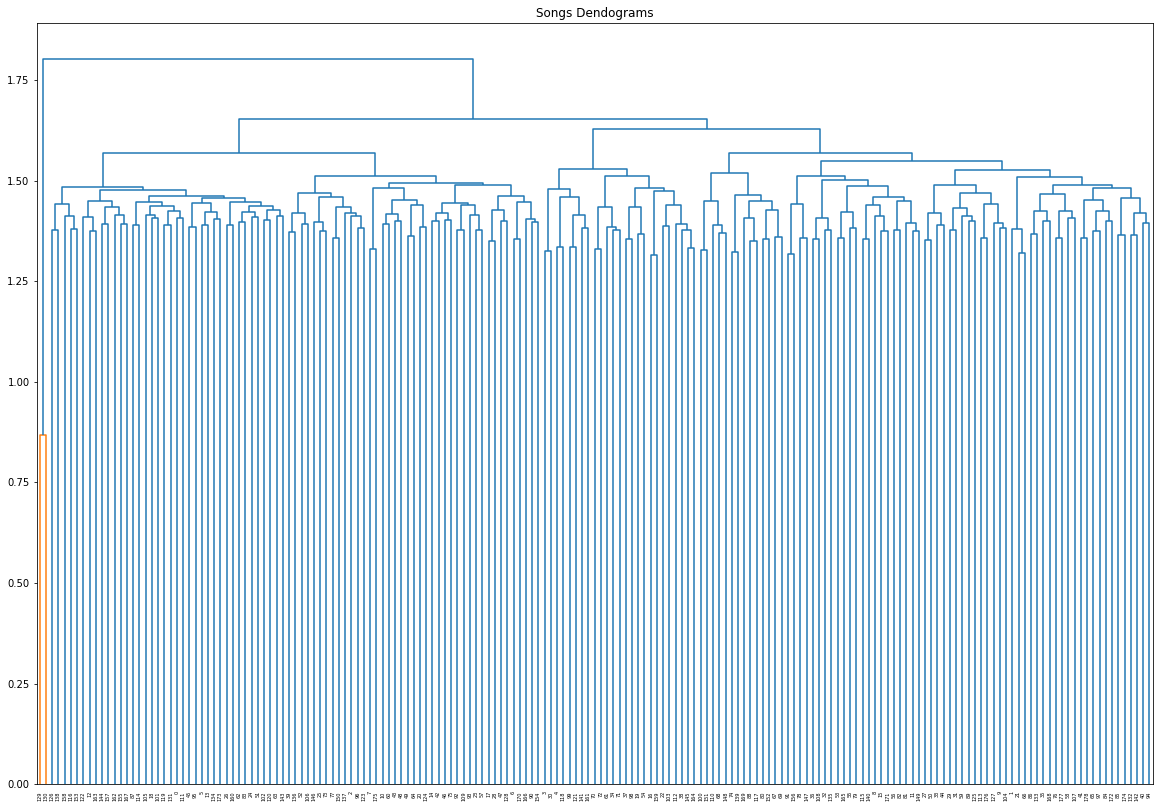

In [159]:
# CAH

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.title("Songs Dendograms")
Z = shc.linkage(scaled_features_countb, method='ward')
dend = shc.dendrogram(Z)

Ok, that's nice, but can't we get a better looking plot, with labels, appropriate coulours, etc. ?

In [258]:
#Verify that labelling is correct
#list(scaled_features_count.index)
#dend["leaves"]

('Lennon', '"Sgt. Pepper\'s Lonely Hearts Club Band (Reprise)"')

In [379]:
# Create labels
# First, labels
#nodeLabels = [s[0]+"_"+s[1] for s in list(scaled_features_count.index[dend["leaves"]])]
nodeLabels = [s[0]+"_"+s[1] for s in list(scaled_features_count.index)]
#nodeLabels = {dend["leaves"][i[0]]: nodeLabels[i[0]] for i in enumerate(nodeLabels)}
#{i: list(scaled_features_count.index)[i][0] for i in dend["leaves"] }
#nodeLabels

In [314]:
# Create colors
# Thanks to Ulrich Stern,
# https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func
cols = {i[0]: i[1][0] for i in enumerate(list(scaled_features_count.index))}
for col in cols:
    #print(cols.get(col))
    if cols.get(col) == 'Lennon':
        cols[col] = '#FF0000' #'red'
    elif cols.get(col) == 'McCartney':
        cols[col] =  '#0000FF' #'blue'
    else: 
        cols[col] = '#800080' # purple
    #print(cols[col])

#cols
dflt_col = "#808080"   # Unclustered gray
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else cols[x]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

#link_cols
# and finally for leaf coloring
label_colors = {i[1]: cols[i[0]] for i in enumerate(nodeLabels)}

In [378]:
#nodeLabels[129]
#cols[129]
#label_colors

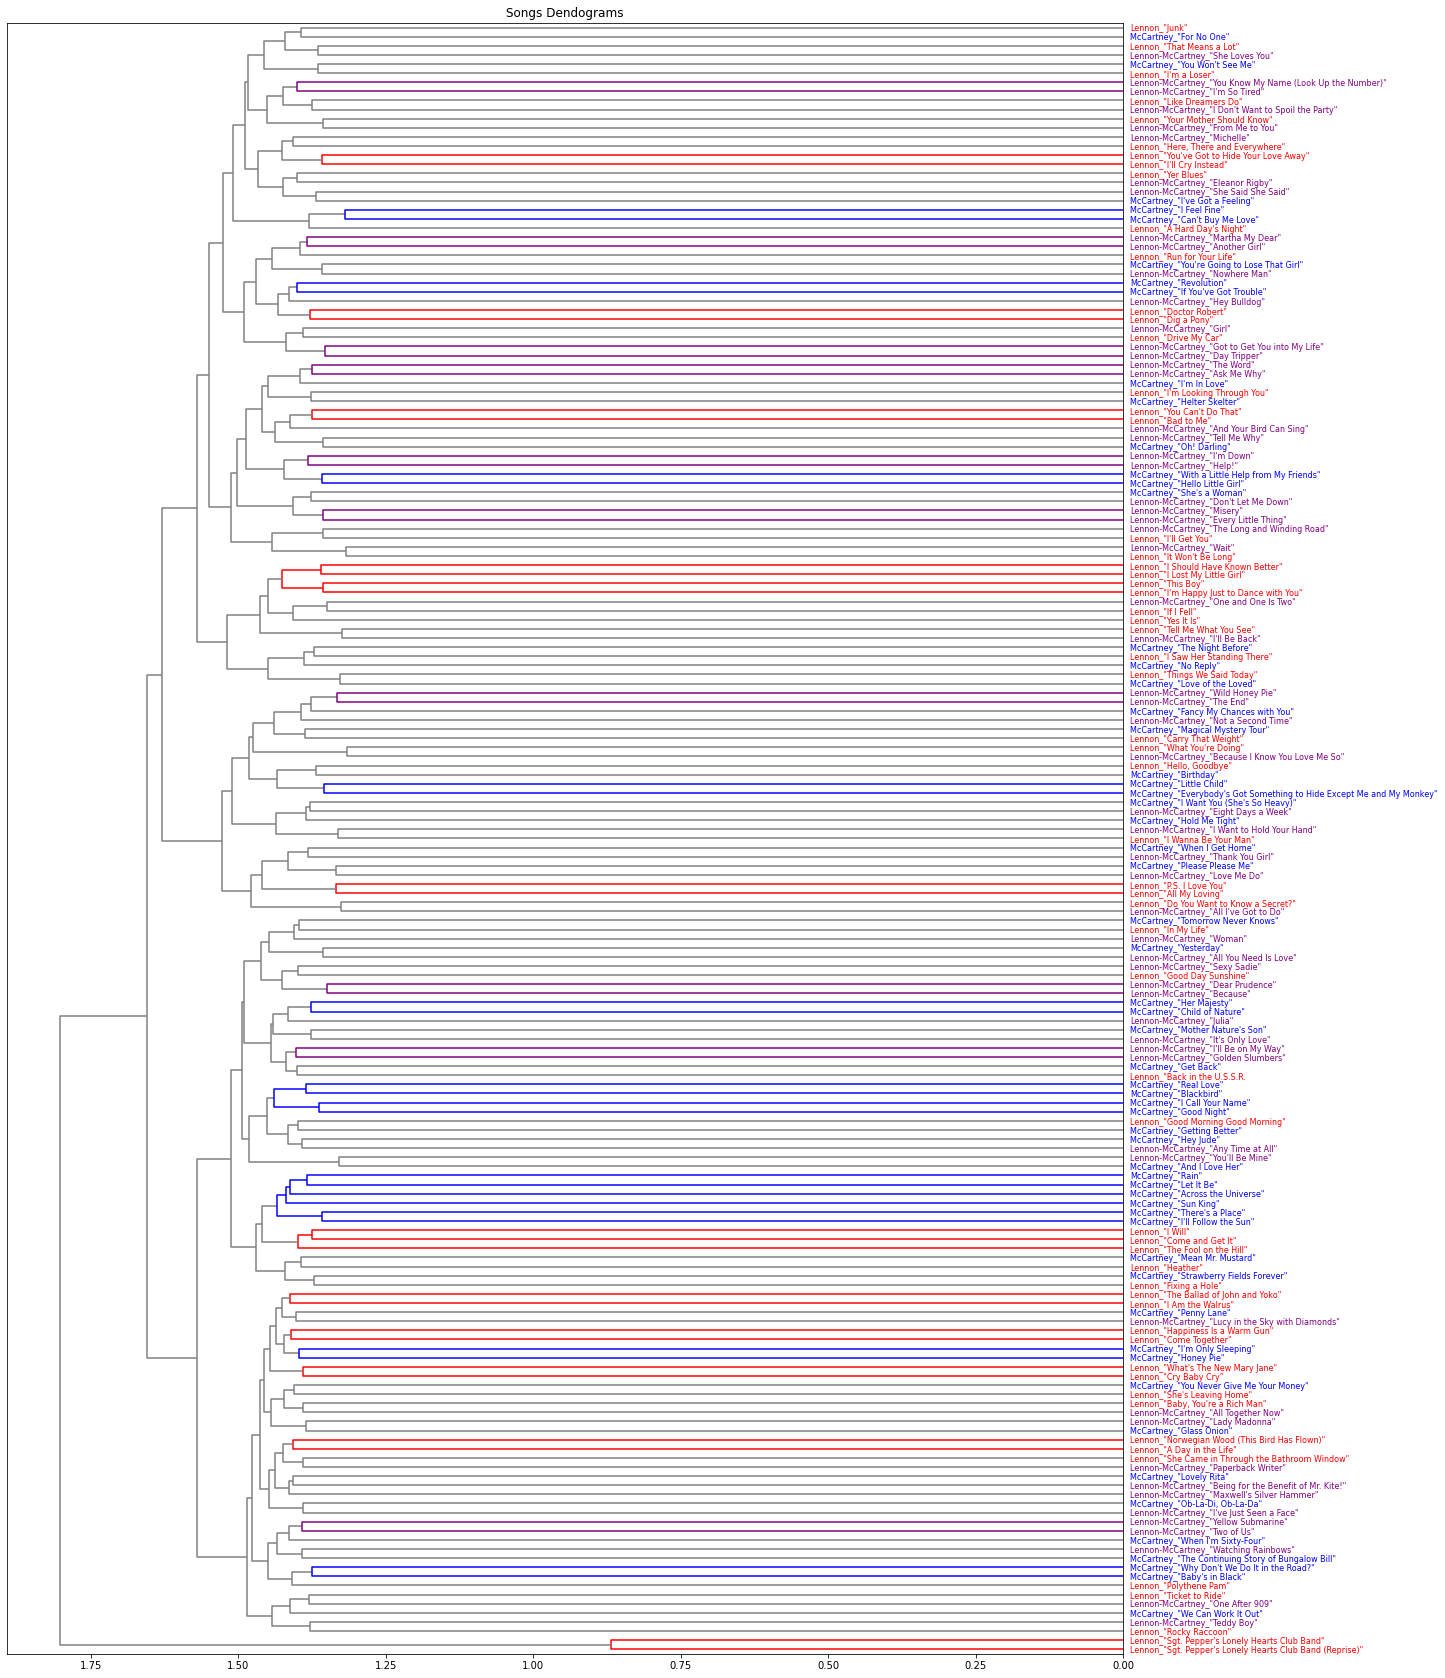

In [320]:
plt.figure(figsize=(20, 30))
#fig = plt.figure(figsize=(20, 30))
plt.title("Songs Dendograms")
#ax = fig.add_subplot(10,10,10)

shc.dendrogram(
            Z,
#            ax=ax,
#            truncate_mode='lastp',  # show only the last p merged clusters
#            p=len(labels),  # show only the last p merged clusters
            leaf_font_size=8, 
            orientation='left',
            color_threshold=None,
            labels = nodeLabels,
            link_color_func=lambda x: link_cols[x]
            )

plt.draw()

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#dend['leaves']
# Branch colors show «pure» clusters

and now onto an heatmap, based on crossing CAH:

<Figure size 2880x2880 with 0 Axes>

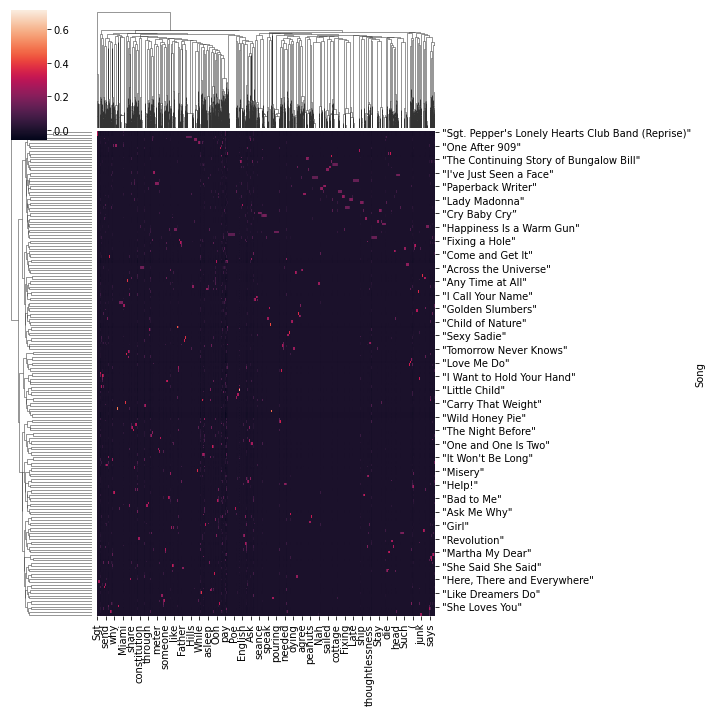

In [324]:
import seaborn as sns

plt.figure(figsize=(40,40))
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(scaled_features_countb,  method="ward") #does not accept Ward with Manhattan, but should
plt.show()

Not very useful for us. Actually, what we are trying to do is not preexistent in Seaborn, we need more imagination.

In [403]:
#scaled_features_countb.values
#[nodeLabels[i] for i in dend['leaves']]
#dists
#df = scaled_features_countb.reindex([label[1] for label in list(scaled_features_count.index[dend["leaves"]])])
#df
#dists
#[label for label in list(scaled_features_countb.index[dend["leaves"]])]

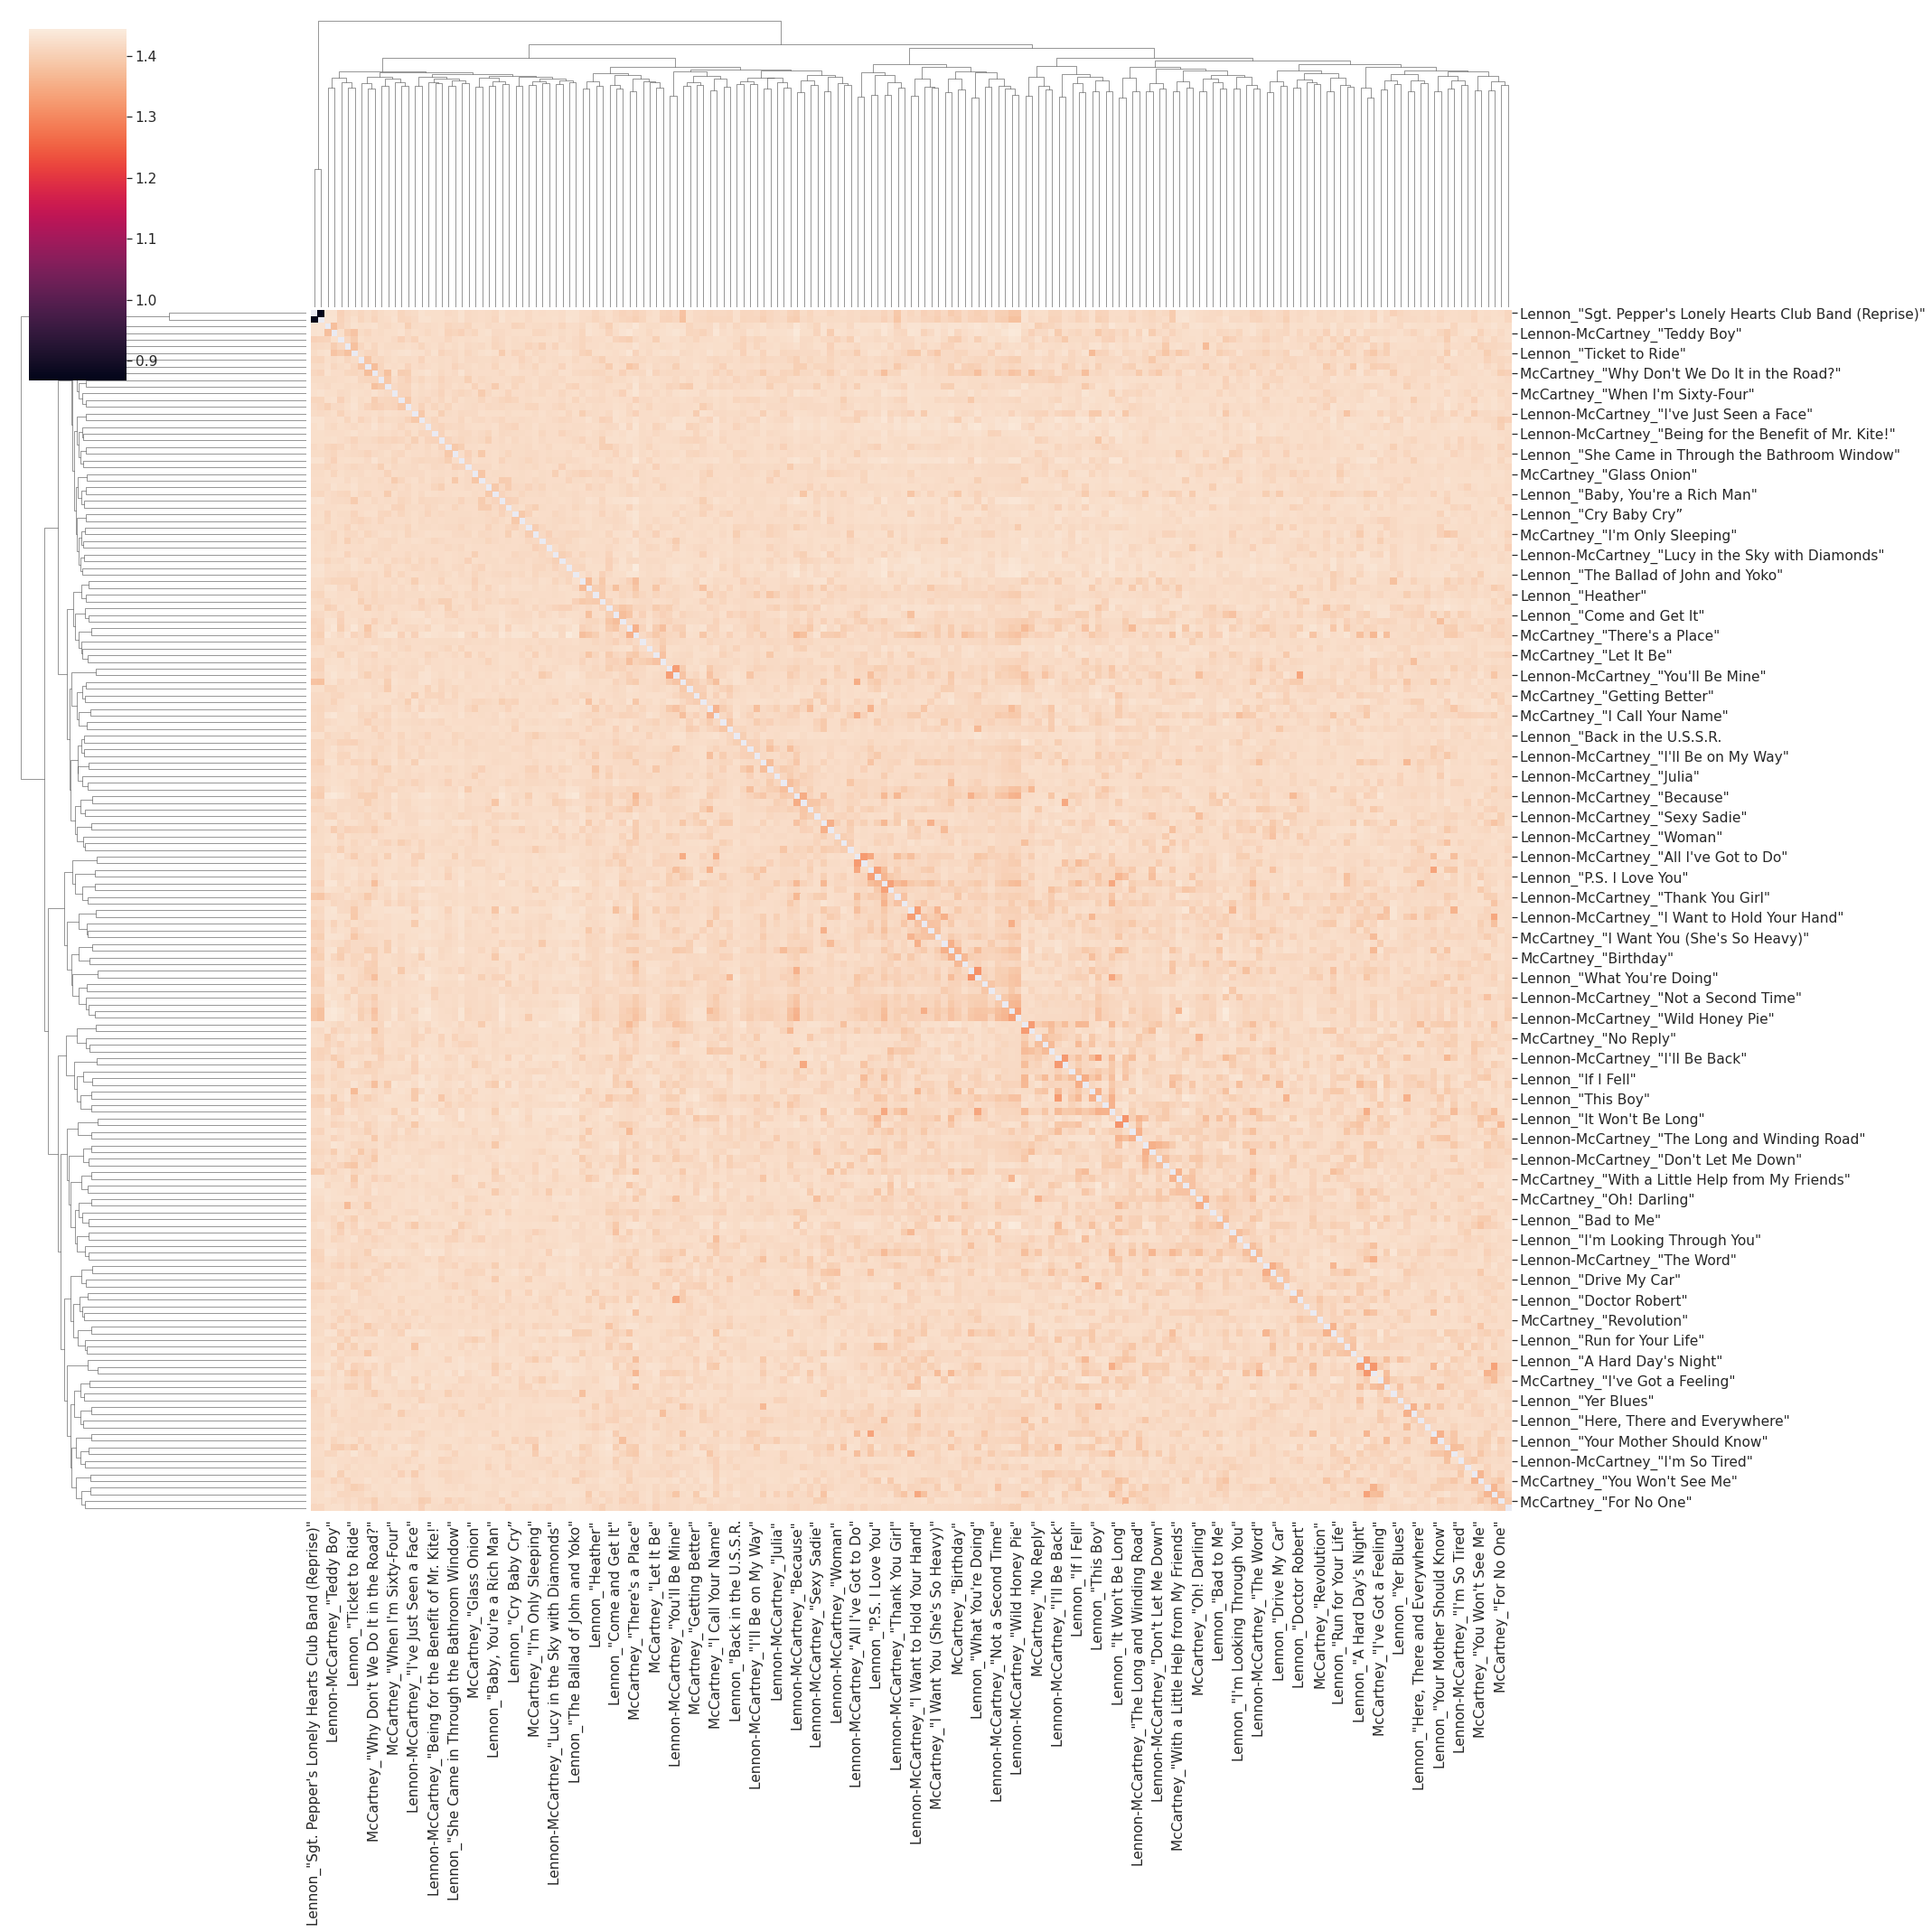

In [408]:
import scipy.spatial

# get distance matrix
dists = pd.DataFrame(scipy.spatial.distance.cdist(scaled_features_countb.values, scaled_features_countb.values), 
             index=scaled_features_countb.index, columns=scaled_features_countb.index)
# Reorder rows and columns
dists = dists.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])], columns = [label for label in list(scaled_features_countb.index[dend["leaves"]])])


df = scaled_features_countb.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])])

Z = linkage(df, 'ward')

# mask 0 values to avoid messing the scales up (cf. edges length on dendrogram…)
mask = dists == 0

sns.set(font_scale=1.4)
sns.clustermap(dists, row_linkage=Z, col_linkage=Z, mask=mask, figsize=(30,30))
#sns.clustermap(dists, method="ward", cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));


To finish, it is also imaginable to apply dimensionnality reduction techniques, to explore the texts in two dimensions.

[0.11261171 0.09416768]


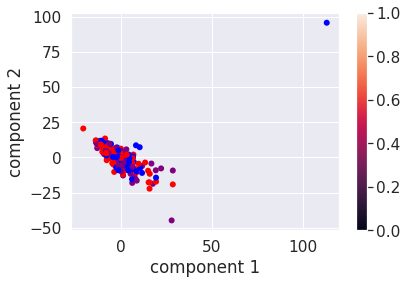

In [431]:
#count
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA
pca = PCA(n_components=2)
pca.fit(count)
print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)

# again, get some color



plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

OUCH, PCA is very subject to outliers. Let's try a supposedly more robust version.

(NB: this one is a bit intensive. MiniBatchSparsePCA provides a more efficient if less exact version)

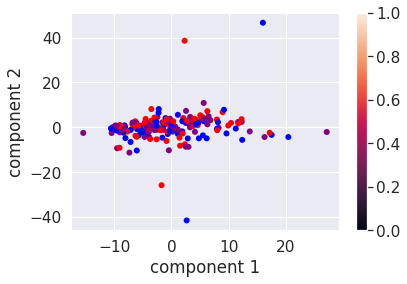

In [429]:
#pca = SparsePCA(n_components=2)
# if the previous is too long use:
pca = MiniBatchSparsePCA(n_components=2)
pca.fit(count)
#print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)


plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none', )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**FIN DU PARCOURS MODIFIÉ**

In [76]:
# Ok, mais on aimerait bien colorer les branches non pas en fonction de la classification 
# opérée par l'algo, mais bien plus par l'attribution d'origine :

# Cf. https://www.python-graph-gallery.com/402-color-dendrogram-labels

# Libraries

import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Calculate the distance between each based on ward distance
Z = linkage(scaled_features_count, 'ward')
 
Z

array([[129.        , 130.        ,   0.86801285,   2.        ],
       [ 16.        , 159.        ,   1.31478904,   2.        ],
       [ 91.        , 156.        ,   1.31675099,   2.        ],
       [ 21.        ,  66.        ,   1.31957496,   2.        ],
       [ 74.        , 139.        ,   1.3233633 ,   2.        ],
       [  3.        ,  30.        ,   1.32494048,   2.        ],
       [100.        , 151.        ,   1.32767753,   2.        ],
       [  7.        , 175.        ,   1.32976488,   2.        ],
       [ 70.        ,  72.        ,   1.33113609,   2.        ],
       [145.        , 164.        ,   1.33232257,   2.        ],
       [ 99.        , 121.        ,   1.33380626,   2.        ],
       [  4.        , 118.        ,   1.33468074,   2.        ],
       [ 17.        ,  28.        ,   1.34952702,   2.        ],
       [ 88.        , 117.        ,   1.34995907,   2.        ],
       [ 27.        ,  50.        ,   1.35288498,   2.        ],
       [ 37.        ,  98

In [77]:
# Sélection des données pour régler pb avec la génération du dendogram :
liste_col_sgwr = list(corpus_clean['Song'])
liste_col_sgwr
# corpus_clean

['"Across the Universe"',
 '"All I\'ve Got to Do"',
 '"All My Loving"',
 '"All Together Now"',
 '"All You Need Is Love"',
 '"And I Love Her"',
 '"And Your Bird Can Sing"',
 '"Another Girl"',
 '"Any Time at All"',
 '"Ask Me Why"',
 '"Baby, You\'re a Rich Man"',
 '"Baby\'s in Black"',
 '"Back in the U.S.S.R.',
 '"Bad to Me"',
 '"The Ballad of John and Yoko"',
 '"Because"',
 '"Because I Know You Love Me So"',
 '"Being for the Benefit of Mr. Kite!"',
 '"Birthday"',
 '"Blackbird"',
 '"Can\'t Buy Me Love"',
 '"Carry That Weight"',
 '"Child of Nature"',
 '"Come and Get It"',
 '"Come Together"',
 '"The Continuing Story of Bungalow Bill"',
 '"Cry Baby Cry”',
 '"A Day in the Life"',
 '"Day Tripper"',
 '"Dear Prudence"',
 '"Dig a Pony"',
 '"Do You Want to Know a Secret?"',
 '"Doctor Robert"',
 '"Don\'t Let Me Down"',
 '"Drive My Car"',
 '"Eight Days a Week"',
 '"Eleanor Rigby"',
 '"The End"',
 '"Every Little Thing"',
 '"Everybody\'s Got Something to Hide Except Me and My Monkey"',
 '"Fixing a Hol

In [78]:
# Réintroduction de la variable Song dans le tableau puis transformation de la colonne en variable catégorielle : 
# https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

scaled_features_count=scaled_features_count.reset_index(level='Songwriter(s)')
scaled_features_count

,Songwriter(s),,!,"""",','Cause,'cause,'d,'ll,'m,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
Song,,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",Lennon,-0.002059,-0.002498,-0.002502,-0.002349,-0.002591,-0.002442,0.035182,-0.006285,-0.004773,...,-0.001190,-0.000885,-0.009091,-0.001896,-0.000885,-0.005265,-0.000885,-0.001892,-0.000885,-0.000885
"""A Hard Day's Night""",Lennon,-0.004375,0.017871,-0.005317,-0.004992,-0.005506,0.137730,-0.008187,0.008577,0.013591,...,-0.002528,-0.001880,0.013397,-0.004028,-0.001880,-0.011189,-0.001880,-0.004020,-0.001880,-0.001880
"""Across the Universe""",McCartney,-0.002113,-0.002564,-0.002568,-0.002411,-0.002659,-0.002506,-0.003954,-0.006450,-0.004899,...,-0.001221,-0.000908,-0.012489,-0.001945,-0.000908,-0.005404,-0.000908,-0.001941,-0.000908,-0.000908
"""All I've Got to Do""",Lennon-McCartney,0.168521,-0.006179,-0.006188,-0.005809,-0.006408,-0.006040,-0.009529,0.048272,-0.011805,...,-0.002942,-0.002188,0.023206,-0.004688,-0.002188,-0.002799,-0.002188,-0.004678,-0.002188,-0.002188
"""All My Loving""",Lennon,-0.004480,-0.005437,-0.005444,-0.005112,-0.005639,-0.005315,-0.008384,0.154774,0.013918,...,-0.002589,-0.001925,0.007018,-0.004125,-0.001925,0.006533,-0.001925,-0.004116,-0.001925,-0.001925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""You Won't See Me""",McCartney,-0.003909,-0.004744,-0.004750,-0.004460,-0.004920,-0.004637,-0.007315,-0.011933,-0.009063,...,-0.002259,-0.001680,0.023662,-0.003599,-0.001680,0.005700,-0.001680,-0.003591,-0.001680,-0.001680
"""You'll Be Mine""",Lennon-McCartney,-0.005388,0.022009,-0.006548,-0.006148,-0.006781,-0.006392,-0.010083,0.105107,-0.012493,...,-0.003114,-0.002316,-0.011705,-0.004961,-0.002316,-0.002962,-0.002316,-0.004951,-0.002316,-0.002316
"""You're Going to Lose That Girl""",McCartney,-0.005578,-0.006769,-0.006779,-0.006364,0.045339,-0.006617,-0.010438,0.024918,-0.012933,...,-0.003223,-0.002397,0.004567,-0.005136,-0.002397,-0.014266,-0.002397,-0.005125,-0.002397,-0.002397


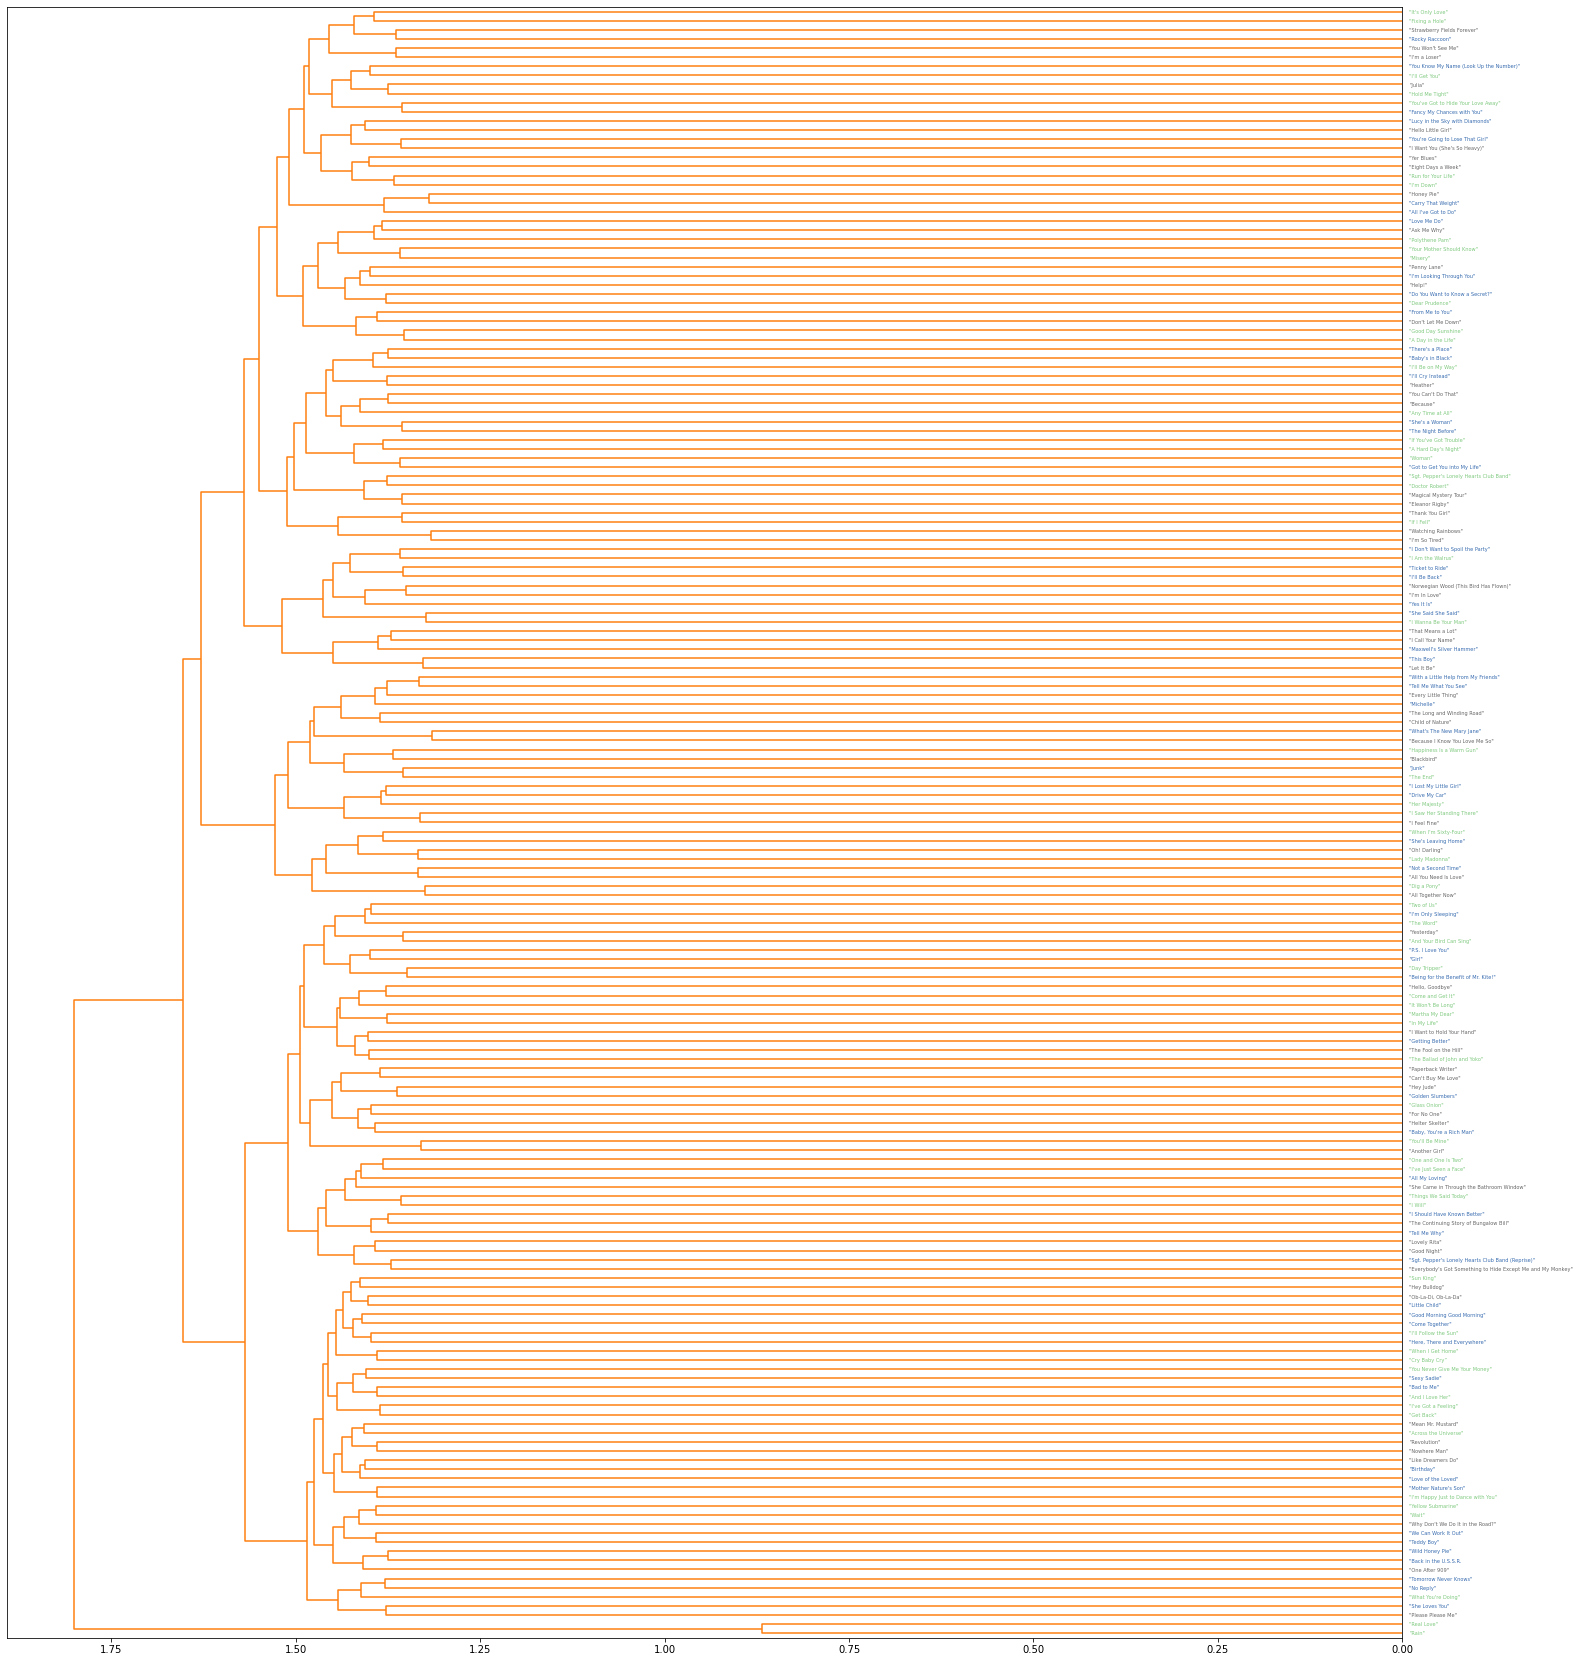

In [79]:
# Make the dendrogram
plt.figure(figsize=(25, 30))
shc.dendrogram(Z, labels=liste_col_sgwr, leaf_rotation=0, orientation="left", color_threshold=120, above_threshold_color='grey')
 
# Create a color palette with 3 colors for the 3 authors possibilities
my_palette = plt.cm.get_cmap("Accent", 3)

# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
scaled_features_count['Songwriter(s)']=pd.Categorical(scaled_features_count['Songwriter(s)'])
my_color=scaled_features_count['Songwriter(s)'].cat.codes

# Apply the right color to each label


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    lbl.set_color(my_palette(val))

# Show the graph

plt.show()

# Légende : 

## VERT = MCCartney
## GRIS = Lennon
## BLEU = LMC

In [ ]:
## Interprétation...?

In [19]:
# Tri par Songwriter(s) pour analyser les clusters ensuite :

scaled_features_count = scaled_features_count.sort_values(by=['Songwriter(s)'])
scaled_features_count

,Songwriter(s),,!,"""",','Cause,'cause,'d,'ll,'m,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
Song,,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,2.980621,-0.532446,-0.404385,...,-0.100787,-0.074953,-0.770142,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""It Won't Be Long""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,0.779129,0.068719,...,-0.100787,-0.074953,0.664493,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""In My Life""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,1.216321,-0.404385,...,-0.100787,-0.074953,-0.509299,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""You've Got to Hide Your Love Away""",Lennon,-0.174422,-0.211667,0.955427,-0.198994,-0.21951,-0.206897,-0.326390,-0.532446,-0.167833,...,-0.100787,-0.074953,-0.248456,-0.160586,-0.074953,0.954725,-0.074953,-0.160247,-0.074953,-0.074953
"""If I Fell""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,4.69203,-0.206897,-0.326390,-0.532446,-0.404385,...,-0.100787,-0.074953,0.403651,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""Little Child""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,-0.095254,0.068719,...,-0.100787,-0.074953,-0.248456,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""Baby's in Black""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,0.341938,0.778375,...,-0.100787,-0.074953,-1.030985,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""Everybody's Got Something to Hide Except Me and My Monkey""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,-0.532446,-0.404385,...,-0.100787,-0.074953,-0.509299,-0.160586,-0.074953,0.254333,-0.074953,-0.160247,-0.074953,-0.074953


In [20]:
# Réintroduction de la variable Songwriters dans le tableau pour qu'elle ne soit pas prise en compte :
scaled_features_count=scaled_features_count.set_index('Songwriter(s)', append=True)
scaled_features_count
#df.set_index(['Company', 'date'], inplace=True)

,,,!,"""",','Cause,'cause,'d,'ll,'m,'re,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
Song,Songwriter(s),,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,2.980621,-0.532446,-0.404385,-0.402911,...,-0.100787,-0.074953,-0.770142,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""It Won't Be Long""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,0.779129,0.068719,3.093872,...,-0.100787,-0.074953,0.664493,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""In My Life""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,1.216321,-0.404385,-0.402911,...,-0.100787,-0.074953,-0.509299,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""You've Got to Hide Your Love Away""",Lennon,-0.174422,-0.211667,0.955427,-0.198994,-0.21951,-0.206897,-0.326390,-0.532446,-0.167833,-0.402911,...,-0.100787,-0.074953,-0.248456,-0.160586,-0.074953,0.954725,-0.074953,-0.160247,-0.074953,-0.074953
"""If I Fell""",Lennon,-0.174422,-0.211667,-0.211955,-0.198994,4.69203,-0.206897,-0.326390,-0.532446,-0.404385,-0.402911,...,-0.100787,-0.074953,0.403651,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""Little Child""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,-0.095254,0.068719,0.908382,...,-0.100787,-0.074953,-0.248456,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""Baby's in Black""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,0.341938,0.778375,-0.402911,...,-0.100787,-0.074953,-1.030985,-0.160586,-0.074953,-0.446060,-0.074953,-0.160247,-0.074953,-0.074953
"""Everybody's Got Something to Hide Except Me and My Monkey""",McCartney,-0.174422,-0.211667,-0.211955,-0.198994,-0.21951,-0.206897,-0.326390,-0.532446,-0.404385,-0.402911,...,-0.100787,-0.074953,-0.509299,-0.160586,-0.074953,0.254333,-0.074953,-0.160247,-0.074953,-0.074953


In [21]:
## Correlation plot + hierarchical clustering on Songs

# Cf. https://www.kaggle.com/sgalella/correlation-heatmaps-with-hierarchical-clustering

# Besoin de transposer les données d'abord : rows to columns et réciproquement :

count_transpose = scaled_features_count.T
count_transpose

Song,"""A Day in the Life""","""It Won't Be Long""","""In My Life""","""You've Got to Hide Your Love Away""","""If I Fell""","""I'm a Loser""","""I'm Looking Through You""","""I'm Happy Just to Dance with You""","""I'll Get You""","""I'll Cry Instead""",...,"""I'll Follow the Sun""","""I Want You (She's So Heavy)""","""She's a Woman""","""Strawberry Fields Forever""","""Sun King""","""Little Child""","""Baby's in Black""","""Everybody's Got Something to Hide Except Me and My Monkey""","""The Continuing Story of Bungalow Bill""","""If You've Got Trouble"""
Songwriter(s),Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,...,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney
,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,1.312320,-0.174422,-0.174422,-0.174422,...,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,0.321158,-0.174422
!,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,...,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667
"""",-0.211955,-0.211955,-0.211955,0.955427,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,...,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955
',-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,...,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994
'Cause,-0.219510,-0.219510,-0.219510,-0.219510,4.692030,-0.219510,-0.219510,6.329209,-0.219510,1.417670,...,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
your,-0.446060,-0.446060,-0.446060,0.954725,-0.446060,-0.446060,-0.446060,-0.095864,-0.095864,-0.095864,...,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,0.254333,-0.446060,0.954725
yours,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,...,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953
yourself,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,2.447409,-0.160247,...,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,5.055066


In [27]:
corr = scaled_features_count.corr()
corr

# TODO : ajouter les variables Song et Songwriter(s) pour pas faire planter le prochain algo.

,,!,"""",','Cause,'cause,'d,'ll,'m,'re,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
,1.000000,-0.036919,-0.036970,-0.034709,-0.033755,-0.036087,0.280309,0.035433,-0.051869,-0.008559,...,-0.017579,-0.013073,0.078350,-0.028010,-0.013073,0.299354,-0.013073,-0.027951,0.024072,-0.013073
!,-0.036919,1.000000,0.196205,0.104993,-0.046463,0.029743,-0.063395,0.004665,0.018209,-0.055948,...,0.071805,-0.015865,-0.070769,0.139141,0.261193,-0.056450,-0.015865,-0.020457,-0.015865,-0.015865
"""",-0.036970,0.196205,1.000000,-0.026691,-0.046526,-0.006695,0.103358,-0.033020,0.017651,0.045729,...,-0.021362,-0.015887,-0.036501,0.215917,-0.015887,-0.005474,-0.015887,-0.016959,-0.015887,-0.015887
',-0.034709,0.104993,-0.026691,1.000000,0.043196,0.110001,0.022794,0.015844,0.035642,-0.027989,...,-0.020056,-0.014915,-0.014837,0.158714,0.519051,0.041319,-0.014915,-0.031888,-0.014915,-0.014915
'Cause,-0.033755,-0.046463,-0.046526,0.043196,1.000000,0.058808,0.230822,0.047068,0.038884,0.063474,...,-0.022124,-0.016453,0.157792,-0.035250,-0.016453,-0.033855,-0.016453,-0.035176,-0.016453,-0.016453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
your,0.299354,-0.056450,-0.005474,0.041319,-0.033855,-0.058848,0.016157,0.009686,-0.045245,0.001567,...,-0.009662,-0.007185,0.042268,-0.043513,-0.033434,1.000000,-0.033434,0.020350,-0.033434,0.019063
yours,-0.013073,-0.015865,-0.015887,-0.014915,-0.016453,-0.015508,-0.024464,0.025629,-0.030310,-0.030199,...,0.893926,-0.005618,0.079132,-0.012036,-0.005618,-0.033434,1.000000,-0.012011,-0.005618,-0.005618
yourself,-0.027951,-0.020457,-0.016959,-0.031888,-0.035176,0.091349,-0.004127,0.003843,0.128178,0.183771,...,-0.016151,-0.012011,0.108383,-0.025733,-0.012011,0.020350,-0.012011,1.000000,-0.012011,-0.012011
zapped,0.024072,-0.015865,-0.015887,-0.014915,-0.016453,-0.015508,-0.024464,-0.039909,-0.030310,-0.030199,...,-0.007554,-0.005618,-0.038174,-0.012036,-0.005618,-0.033434,-0.005618,-0.012011,1.000000,-0.005618


In [26]:
# Réf : https://seaborn.pydata.org/generated/seaborn.clustermap.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

# Calcul de corrélation : 

corr = scaled_features_count.corr()

# method : ward : minimizes the variant between the clusters.
# metric : euclidienne

sns.clustermap(corr, method="ward", metric = "euclidean", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(30,30))


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd4d1a5aaf0> (for post_execute):


KeyboardInterrupt: 

#### Sur le choix des paramètres : 

Cf.  Maciej Eder, Visualization in stylometry: Cluster analysis using networks,  Digital Scholarship in the Humanities, Volume 32, Issue 1, April 2017, Pages 50–64, https://doi.org/10.1093/llc/fqv061 : https://academic.oup.com/dsh/article/32/1/50/2957386.

"Even if some issues still remain unresolved, scholars roughly agree that Euclidean (normalized) distance and Ward’s linking algorithm provide acceptable results"

<AxesSubplot:xlabel='Song-Songwriter(s)', ylabel='Song-Songwriter(s)'>

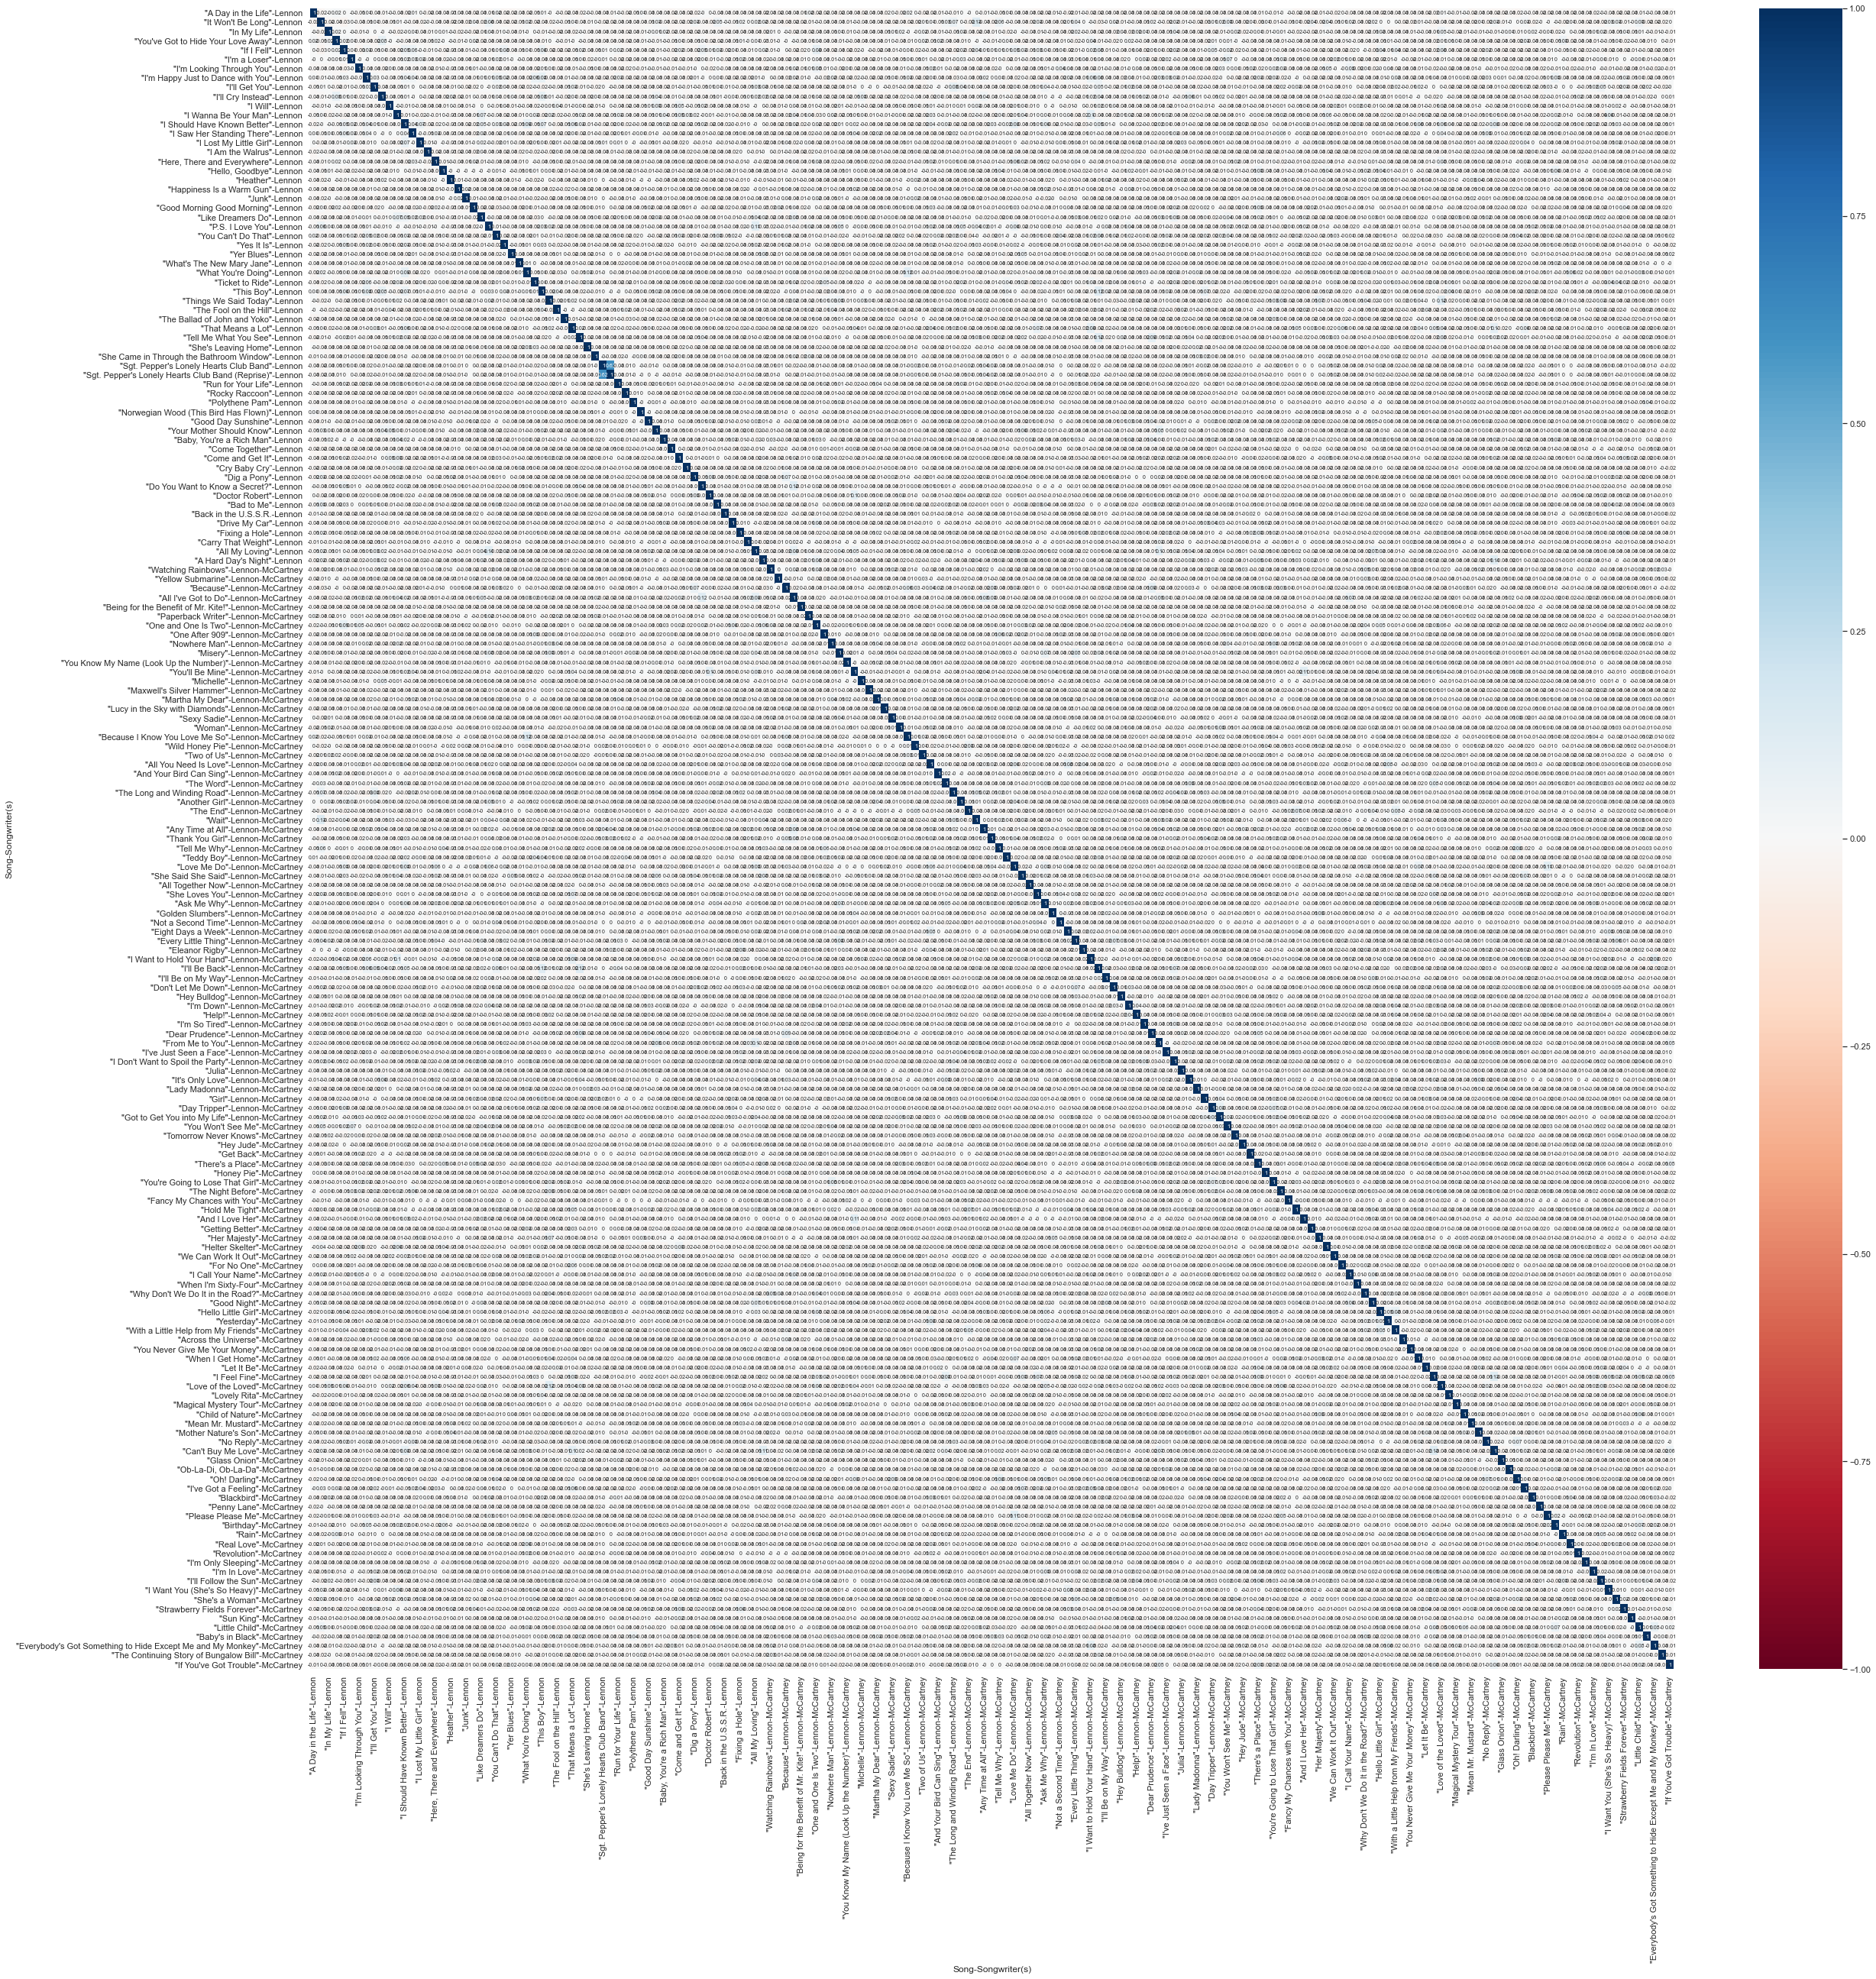

In [22]:
import seaborn as sns; sns.set_theme(color_codes=True)

plt.figure(figsize=(40,40))
correlations = count_transpose.corr()
correlations
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)

In [23]:
count_transpose

Song,"""A Day in the Life""","""It Won't Be Long""","""In My Life""","""You've Got to Hide Your Love Away""","""If I Fell""","""I'm a Loser""","""I'm Looking Through You""","""I'm Happy Just to Dance with You""","""I'll Get You""","""I'll Cry Instead""",...,"""I'll Follow the Sun""","""I Want You (She's So Heavy)""","""She's a Woman""","""Strawberry Fields Forever""","""Sun King""","""Little Child""","""Baby's in Black""","""Everybody's Got Something to Hide Except Me and My Monkey""","""The Continuing Story of Bungalow Bill""","""If You've Got Trouble"""
Songwriter(s),Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,Lennon,...,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney,McCartney
,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,1.312320,-0.174422,-0.174422,-0.174422,...,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,-0.174422,0.321158,-0.174422
!,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,...,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667,-0.211667
"""",-0.211955,-0.211955,-0.211955,0.955427,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,...,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955,-0.211955
',-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,...,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994,-0.198994
'Cause,-0.219510,-0.219510,-0.219510,-0.219510,4.692030,-0.219510,-0.219510,6.329209,-0.219510,1.417670,...,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510,-0.219510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
your,-0.446060,-0.446060,-0.446060,0.954725,-0.446060,-0.446060,-0.446060,-0.095864,-0.095864,-0.095864,...,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,-0.446060,0.254333,-0.446060,0.954725
yours,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,...,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953,-0.074953
yourself,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,2.447409,-0.160247,...,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,-0.160247,5.055066


In [ ]:
# Pour l'application facile du dendogramme : voir :

#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [ ]:
# Normalisation euclidienne de longueur.

#### Autres ref : 

https://coderzcolumn.com/tutorials/machine-learning/unsupervised-learning-clustering-kmeans-using-scikit-learn-sklearn

==> https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering
    
==> https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
    
    scikit learn preprocessing : normalize

from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

# À faire :

- Un point sur les CAH : https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
- Un point sur les distances (Cf. cours de Camps)
- Un point sur les métriques.
- Un point sur les normalisations (zscores, ).
Cf. Mémoire.